<a href="https://colab.research.google.com/github/Nanangk/Dicoding_Course_Machine-Learning-/blob/master/SKLearn_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pada latihan kali ini kita akan menggunakan data dari Kaggle yaitu data pengunjung sebuah mall fiktif.**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [33]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [0]:
df = df.rename(columns={'Gender' : 'gender',
                        'Age' : 'age',
                        'Annual Income (k$)' : 'annual_income',
                        'Spending Score (1-100)' : 'spending_score'
})

In [36]:
df.head(10)

,CustomerID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [42]:
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [0]:
from sklearn.cluster import KMeans

In [0]:
X = df.drop(['CustomerID', 'gender'], axis = 1)

In [0]:
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

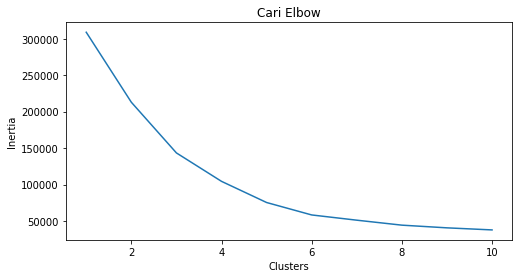

In [49]:
#buat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sn.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

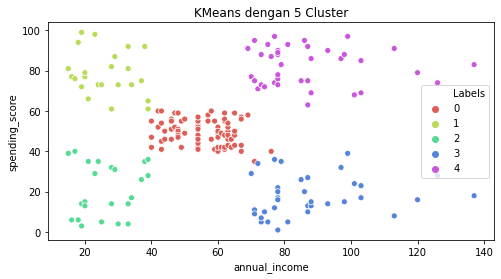

In [51]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sn.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sn.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()